In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.options.display.max_rows = 999


from xgboost import XGBClassifier  
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
#Load up trainhr.csv, with index being "employee_id"
data_ori = pd.read_csv("train_hr.csv",index_col = "employee_id")


In [3]:
#Making backup for modifications in this notebook
data = data_ori 

In [4]:
# Input missings
data.education.fillna("Bachelor's",inplace = True)
data.previous_year_rating.fillna(3.0,inplace = True)

### Grouping categorical values

region column

In [5]:
data['count_region']=data.groupby("region")['gender'].transform('count')
data["region_corrected"] = data.region.where(data["count_region"] >=2000, "others_regions")
data["region_corrected"].value_counts()
data = data.drop(columns = ['count_region'])

In [6]:
#####º no_of_trainings.
data["train_grouped"] = np.where(data["no_of_trainings"] >= 6, "+6 trainings",data["no_of_trainings"])  

data["train_grouped"].dtype
data["train_grouped"].value_counts()

train_grouped
1               44378
2                7987
3                1776
4                 468
5                 128
+6 trainings       71
Name: count, dtype: int64

### Converting categorical variables to dummies

In [7]:
dt=pd.get_dummies(data,columns = ["department"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["region_corrected"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["education"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["train_grouped"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["recruitment_channel"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["previous_year_rating"], drop_first = False)
dt=pd.get_dummies(dt,columns = ["KPIs_met >80%"], drop_first = True)
dt=pd.get_dummies(dt,columns = ["awards_won?"], drop_first = True)
dt =dt.drop(columns = ['region', 'no_of_trainings', 'gender'])


In [8]:
dt.head()

,age,length_of_service,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,previous_year_rating_1.0,previous_year_rating_2.0,previous_year_rating_3.0,previous_year_rating_4.0,previous_year_rating_5.0,KPIs_met >80%_1,awards_won?_1
employee_id,,,,,,,,,,,,,,,,,,,,,
65438,35,8,49,0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,True,False
65141,30,4,60,0,False,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False
7513,34,7,50,0,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2542,39,10,50,0,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,False
48945,45,2,73,0,False,False,False,False,False,False,...,True,False,False,False,False,True,False,False,False,False


In [9]:
dt.dtypes

age                                int64
length_of_service                  int64
avg_training_score                 int64
is_promoted                        int64
department_Analytics                bool
department_Finance                  bool
department_HR                       bool
department_Legal                    bool
department_Operations               bool
department_Procurement              bool
department_R&D                      bool
department_Sales & Marketing        bool
department_Technology               bool
region_corrected_others_regions     bool
region_corrected_region_13          bool
region_corrected_region_15          bool
region_corrected_region_2           bool
region_corrected_region_22          bool
region_corrected_region_26          bool
region_corrected_region_7           bool
education_Bachelor's                bool
education_Below Secondary           bool
education_Master's & above          bool
train_grouped_+6 trainings          bool
train_grouped_1 

In [10]:
# Separate features and target variable
y = dt["is_promoted"]
X = dt.drop("is_promoted", axis=1)


In [11]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Define XGBoost model
xgb_model = XGBClassifier(objective="binary:logistic", 
                          n_estimators=100,
                          learning_rate=0.1,
                          )

In [13]:
# Train XGBoost model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### XGBoost Model training and application

In [14]:
# Make predictions with XGBoost
xgb_preds = xgb_model.predict(X_test)

In [15]:
y_pred_proba = xgb_model.predict_proba(X_test)

In [16]:
# Evaluating model performance
xgb_acc = accuracy_score(y_test, xgb_preds)
print("XGBoost accuracy:", xgb_acc)

XGBoost accuracy: 0.9436234263820471


In [17]:
# Calculate log loss
log_loss(y_test, y_pred_proba)

0.1619958856685004

In [18]:
# Calculate ROC AUC
auc = roc_auc_score(y_test, y_pred_proba[:,1])
print('AUC: %.3f' % auc)

AUC: 0.909


In [19]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba[:,1])

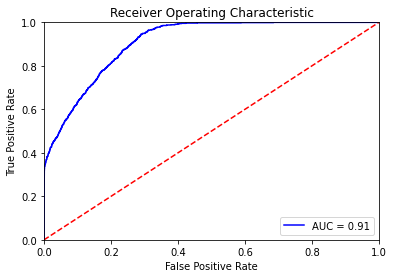

In [20]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#Precision Recall Curve

from sklearn.metrics import precision_recall_curve

yhat=xgb_model.predict_proba(X_test)
pos_probs = pos_probs = yhat[:, 1]
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

no_skill = len(y[y==1]) / len(y)

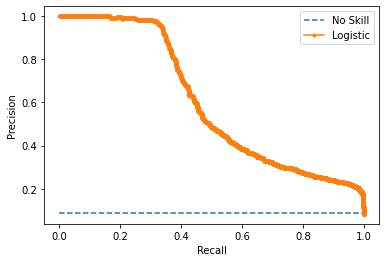

In [22]:
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [23]:
from sklearn.metrics import classification_report

# Print classification report
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10054
           1       0.96      0.33      0.50       908

    accuracy                           0.94     10962
   macro avg       0.95      0.67      0.73     10962
weighted avg       0.94      0.94      0.93     10962

